回归问题：
·高尔顿：

房价预测：

一元线性回归：一个自变量，一个因变量

求解方程：
    h(x) = a x + b

代价函数：
    最小二乘法
    真实值和预测值误差的平方和
    找到合适的参数，使得误差平方和最小
梯度下降法：
   使得代价函数的值最小
   学习率，调节步长
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt

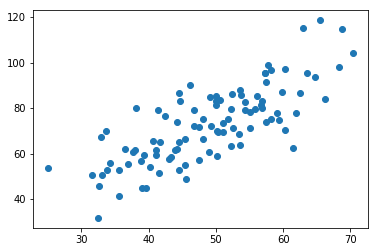

In [3]:
data = np.genfromtxt("data.csv",delimiter=",")
x_data = data[:,0]
y_data = data[:,1]
plt.scatter(x_data,y_data)
plt.show()

In [4]:
lr = 0.0001
b = 0
k = 0
epochs=50

def compute_error(b,k,x_data,y_data):
    totalError = 0
    for i in range(0,len(x_data)):
        totalError +=(y_data[i] - (k*x_data[i] +b))**2
    return totalError / (float(len(x_data))*2.0)

def gradient_descent_runner(x_data,y_data,b,k,lr,epochs):
    m = float(len(x_data))
    
    for i in range(epochs):
        b_grad = 0
        k_grad = 0
        
        for j in range(0,len(x_data)):
            b_grad += (1/m) *((k*x_data[j] +b) - y_data[i])
            k_grad += (1/m) *x_data[j] * (((k*x_data[j]) +b) - y_data[j])
        b = b - (lr*b_grad)
        k = k - (lr*k_grad)
        
        
    return b,k

staring b=0,k=0,error=2782.5539172416056
after b=0.024712251804986027,k=1.4790109980454713,error=56.32664298122392


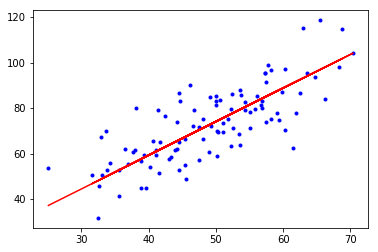

In [5]:

print("staring b={0},k={1},error={2}".format(b,k,compute_error(b,k,x_data,y_data)))
b,k = gradient_descent_runner(x_data,y_data,b,k,lr,epochs)
print("after b={0},k={1},error={2}".format(b,k,compute_error(b,k,x_data,y_data)))

plt.plot(x_data,y_data,'b.')
plt.plot(x_data,k*x_data + b,'r')
plt.show()

In [7]:
#使用sklearn
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


In [13]:
data = np.genfromtxt("data.csv",delimiter=",")
x_data = data[:,0,np.newaxis]
#y_data = data[:,1]
#print(y_data)  []
y_data = data[:,1,np.newaxis]
#print(y_data) [[]] 增加了维度

model = LinearRegression()
model.fit(x_data,y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

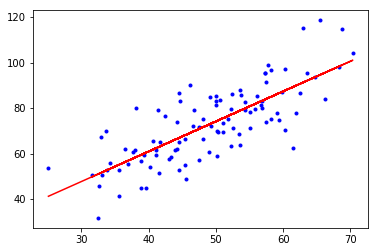

In [15]:
plt.plot(x_data,y_data,'b.')
plt.plot(x_data,model.predict(x_data),'r')
plt.show()